**RECIPE RECOM**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [73]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [74]:
df = pd.read_csv('IndianFoodDatasetCSV.csv')

In [75]:
df.head()

,Srno,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
4,5,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...


In [76]:
df=df.drop(['RecipeName','Ingredients','Instructions'], axis=1)

In [77]:
df.columns

Index(['Srno', 'TranslatedRecipeName', 'TranslatedIngredients',
       'PrepTimeInMins', 'CookTimeInMins', 'TotalTimeInMins', 'Servings',
       'Cuisine', 'Course', 'Diet', 'TranslatedInstructions', 'URL'],
      dtype='object')

In [78]:
df=df.rename(columns={'TranslatedRecipeName' : 'RecipeName' , 'TranslatedIngredients' : 'Ingredients' , 'TranslatedInstructions' : 'Instructions'})

In [79]:
df.columns

Index(['Srno', 'RecipeName', 'Ingredients', 'PrepTimeInMins', 'CookTimeInMins',
       'TotalTimeInMins', 'Servings', 'Cuisine', 'Course', 'Diet',
       'Instructions', 'URL'],
      dtype='object')

In [80]:
df.shape

(6871, 12)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Srno             6871 non-null   int64 
 1   RecipeName       6871 non-null   object
 2   Ingredients      6865 non-null   object
 3   PrepTimeInMins   6871 non-null   int64 
 4   CookTimeInMins   6871 non-null   int64 
 5   TotalTimeInMins  6871 non-null   int64 
 6   Servings         6871 non-null   int64 
 7   Cuisine          6871 non-null   object
 8   Course           6871 non-null   object
 9   Diet             6871 non-null   object
 10  Instructions     6871 non-null   object
 11  URL              6871 non-null   object
dtypes: int64(5), object(7)
memory usage: 644.3+ KB


In [82]:
df.describe()

,Srno,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings
count,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000
mean,4902.979042,28.585213,30.832339,59.417552,5.611410
std,3479.531022,81.042007,34.019694,88.699940,26.221807
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1955.500000,10.000000,20.000000,30.000000,4.000000
50%,4304.000000,15.000000,30.000000,40.000000,4.000000
75%,7363.000000,20.000000,35.000000,55.000000,4.000000
max,14211.000000,2880.000000,900.000000,2925.000000,1000.000000


In [83]:
df.dtypes

,0
Srno,int64
RecipeName,object
Ingredients,object
PrepTimeInMins,int64
CookTimeInMins,int64
TotalTimeInMins,int64
Servings,int64
Cuisine,object
Course,object
Diet,object


In [84]:
df.duplicated().sum()

0

In [85]:
df.isnull().sum()

,0
Srno,0
RecipeName,0
Ingredients,6
PrepTimeInMins,0
CookTimeInMins,0
TotalTimeInMins,0
Servings,0
Cuisine,0
Course,0
Diet,0


In [86]:
df.dropna(inplace=True)

In [87]:
df.isnull().sum()

,0
Srno,0
RecipeName,0
Ingredients,0
PrepTimeInMins,0
CookTimeInMins,0
TotalTimeInMins,0
Servings,0
Cuisine,0
Course,0
Diet,0


In [88]:
df.dropna(inplace=True)

In [89]:
df.shape

(6865, 12)

In [90]:
df.duplicated().sum()

0

In [91]:
df[['CookTimeInMins','PrepTimeInMins','TotalTimeInMins']].isnull().sum()

,0
CookTimeInMins,0
PrepTimeInMins,0
TotalTimeInMins,0


In [92]:
df[['RecipeName','Ingredients']].duplicated().sum()

0

**VISULAISATION**

In [93]:
df['IngredientsNum']=df['Ingredients'].apply(lambda x: len(x.split(',')))

In [94]:
df.head()

,Srno,RecipeName,Ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,URL,IngredientsNum
0,1,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...,10
1,2,Spicy Tomato Rice (Recipe),"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...,12
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...,12
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...,18
4,5,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...,12


In [95]:
df_tt=pd.cut(x=df['TotalTimeInMins'],bins=[0,15,30,40,60,120,240,1440,3000], labels=['0-15','15-30','30-44','45-60','60-120','120-240','240-1 day','1 day+'])

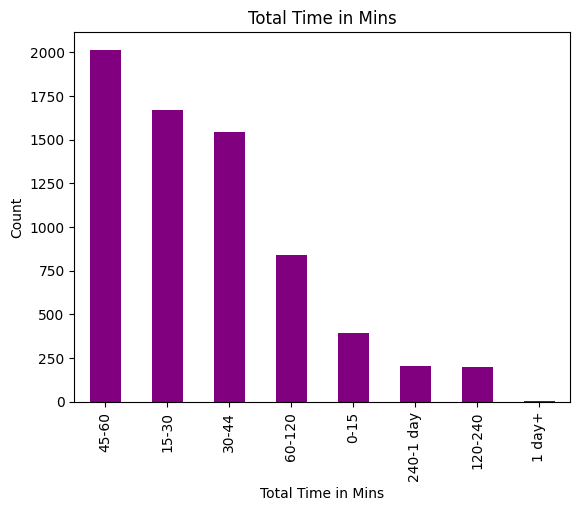

In [96]:
#Count total time in min
df_tt.value_counts().plot(kind='bar',color='purple')
plt.xlabel('Total Time in Mins')
plt.ylabel('Count')
plt.title('Total Time in Mins')
plt.show()

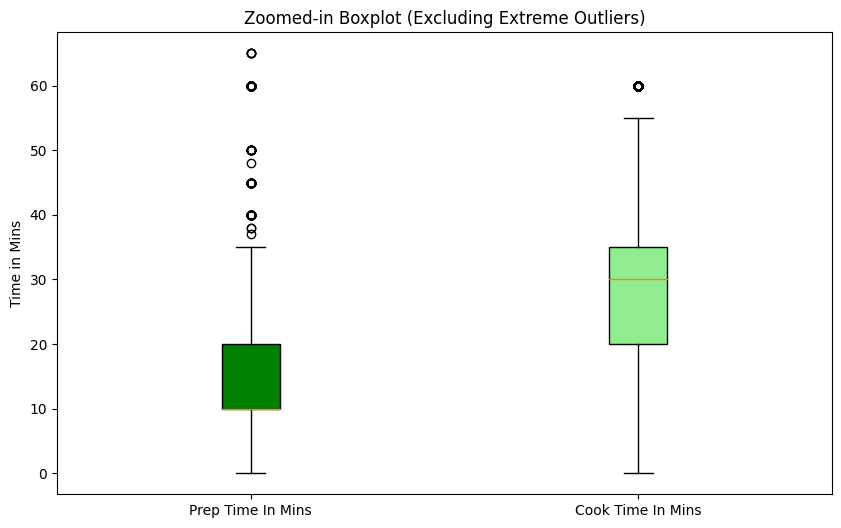

In [97]:
# Calculate the 95th percentile for each column
prep_time_95th = df['PrepTimeInMins'].quantile(0.95)
cook_time_95th = df['CookTimeInMins'].quantile(0.95)

# Filter out values above the 95th percentile
filtered_df = df[(df['PrepTimeInMins'] <= prep_time_95th) & (df['CookTimeInMins'] <= cook_time_95th)]

# Prep time in mins vs cook time iin mins
plt.figure(figsize=(10, 6))
x=plt.boxplot([filtered_df['PrepTimeInMins'], filtered_df['CookTimeInMins']], patch_artist=True, vert=True)
colors = ['green', 'lightgreen']

# Change patch colors
for patch, color in zip(x['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1, 2], ['Prep Time In Mins', 'Cook Time In Mins'])
plt.ylabel('Time in Mins')
plt.title('Zoomed-in Boxplot (Excluding Extreme Outliers)')
plt.show()

<Axes: ylabel='count'>

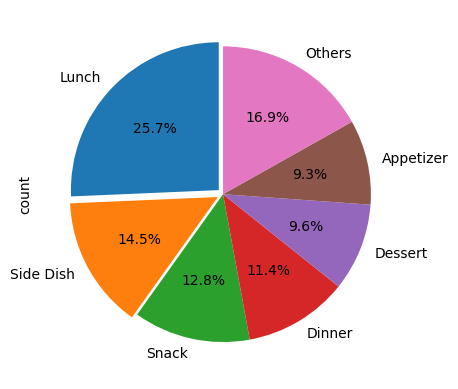

In [98]:
#different courses
course_count=df['Course'].value_counts()
threshold=0.05*course_count.sum()
course_counts_mod=course_count[course_count>=threshold]
course_counts_mod['Others'] = course_count[course_count < threshold].sum()
course_counts_mod.plot(kind='pie', autopct='%1.1f%%', startangle=90,explode=[0.04,0.04,0.0,0.0,0.0,0.0,0.0])

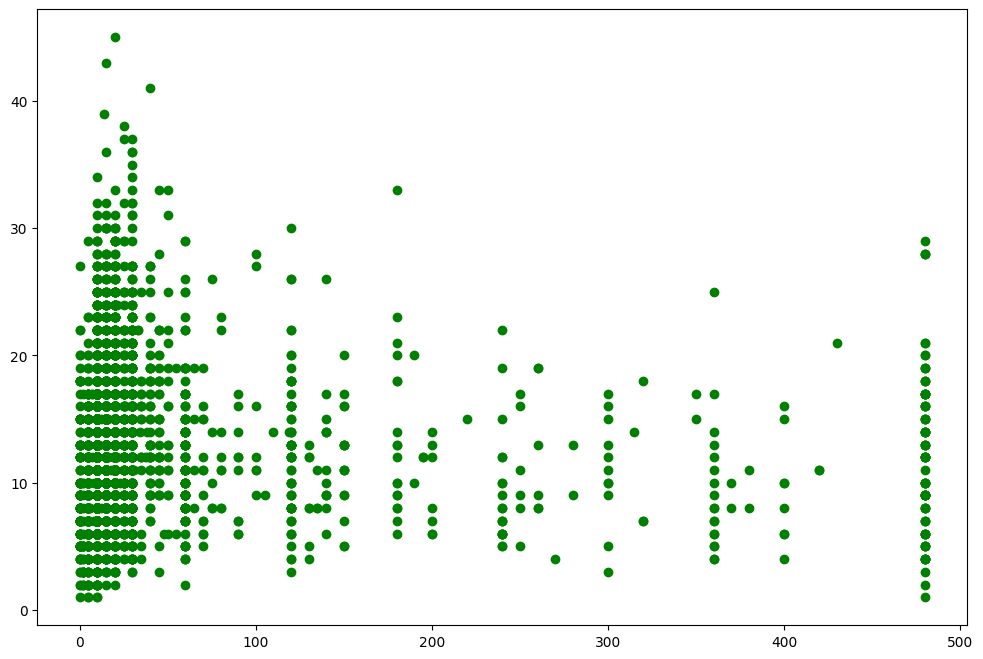

In [99]:
#ingredients vs prep time
lower_bound=df['PrepTimeInMins'].quantile(0.01)
upper_bound=df['PrepTimeInMins'].quantile(0.99)
df['PrepTimeInMins'] = np.clip(df['PrepTimeInMins'], lower_bound, upper_bound)
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.scatter(df['PrepTimeInMins'],df['IngredientsNum'],color='g',marker='o')

In [100]:
df.head(3)

,Srno,RecipeName,Ingredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,URL,IngredientsNum
0,1,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...,10
1,2,Spicy Tomato Rice (Recipe),"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...,12
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...,12


<Axes: ylabel='count'>

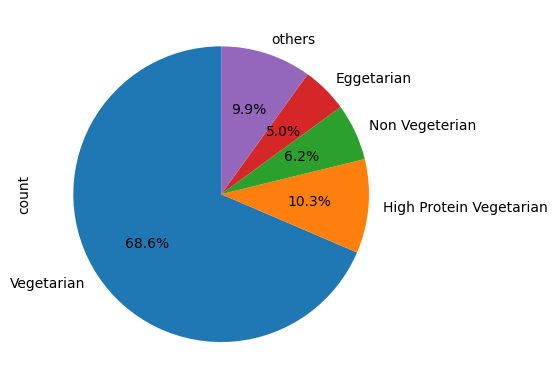

In [101]:
#different types of diet
dietPlot=df['Diet']
value_counts = dietPlot.value_counts()
threshold = 0.05 * value_counts.sum()
dietPlan_mod = value_counts[value_counts >= threshold]
dietPlan_mod['others']=value_counts[value_counts<threshold].sum()
dietPlan_mod.plot(kind='pie',autopct='%1.1f%%',startangle=90)

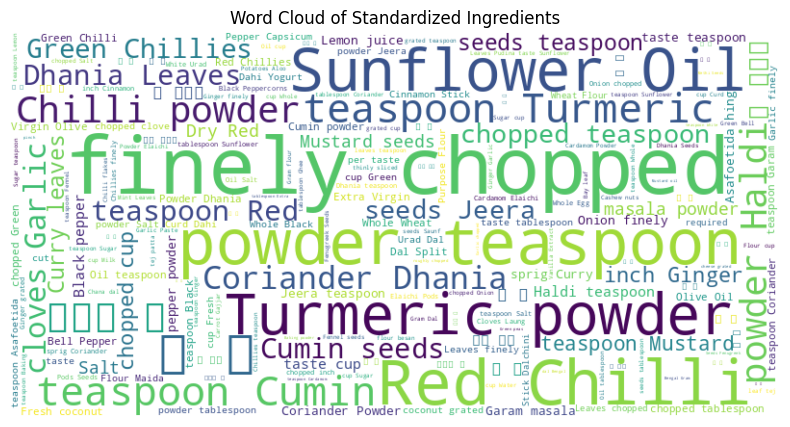

In [102]:
#common ingredients
text_ingd=' '.join(df['Ingredients'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_ingd)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Standardized Ingredients')
plt.show()

In [103]:
from collections import Counter
text_freq=' '.join(df['Ingredients'])
words=text_freq.split()
word_freq=Counter(words)
common_words=word_freq.most_common(10)
common_words

[('-', 36618),
 ('teaspoon', 17499),
 ('cup', 11407),
 ('tablespoon', 6372),
 ('to', 5472),
 ('1', 5153),
 ('finely', 4878),
 ('Red', 3487),
 ('tablespoons', 3435),
 ('powder', 3300)]

Text(0, 0.5, 'Frequency')

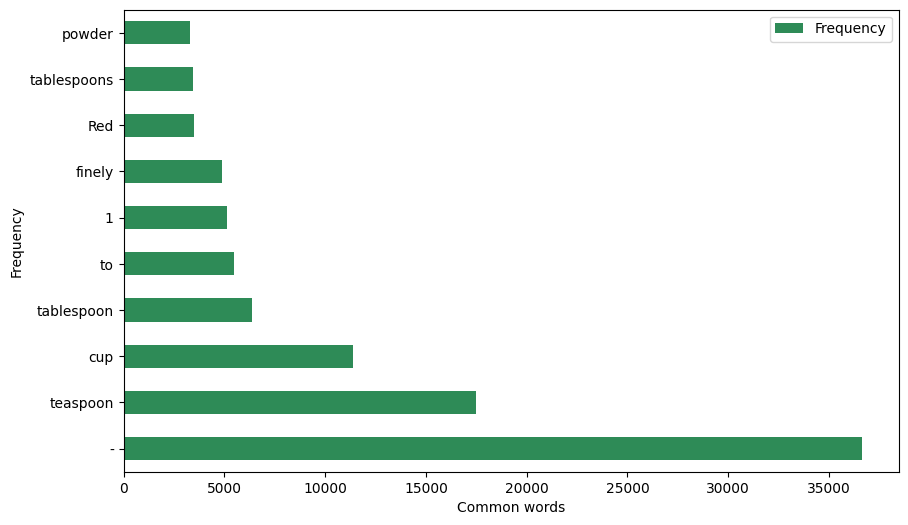

In [104]:
#frequeny of most common ingredients
df_common_words=pd.DataFrame(common_words,columns=['Words','Frequency'])
df_common_words.plot(kind='barh',x='Words',y='Frequency',color='seagreen',figsize=(10,6))
plt.xlabel('Common words')
plt.ylabel('Frequency')

**ML model**

In [105]:
df.isnull().sum()

,0
Srno,0
RecipeName,0
Ingredients,0
PrepTimeInMins,0
CookTimeInMins,0
TotalTimeInMins,0
Servings,0
Cuisine,0
Course,0
Diet,0


In [106]:
df['TotalTimeInMins'].mean()

59.42505462490896

In [107]:
df['Ingredients'].head()

,Ingredients
0,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,Salt - to taste,1 Onion - thinly sliced,3 tablespoon Gram flour (besan),2 teaspoons Turmeric powder (Haldi),1 tablespoon Red Chilli powder,2 teaspoons Cumin seeds (Jeera),1 tablespoon Coriander Powder (Dhania),1 tablespoon Amchur (Dry Mango Powder),Sunflower Oil - as required"
1,"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teaspoons BC Belle Bhat powder, salt - as per taste, 1 teaspoon chickpea lentils, 1/2 teaspoon cumin seeds, 1 teaspoon white urad dal, 1/2 Teaspoon mustard, 1 green chilli, 1 dry red chilli, 2 teaspoon cashew - or peanuts, 1-1 / 2 tablespoon oil - 1/2 teaspoon asafoetida"
2,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 Onion - sliced,1/2 cup Carrots (Gajjar) - chopped,1/3 cup Green peas (Matar),2 Green Chillies,1/4 teaspoon Asafoetida (hing),1 teaspoon Mustard seeds,1 teaspoon White Urad Dal (Split),1 teaspoon Ghee,1 sprig Curry leaves,Salt - to taste,1 teaspoon Lemon juice"
3,"500 grams Chicken,2 Onion - chopped,1 Tomato - chopped,4 Green Chillies - slit,1 inch Ginger - finely chopped,6 cloves Garlic - finely chopped,1/2 teaspoon Turmeric powder (Haldi),1 teaspoon Garam masala powder,2 tablespoon Sesame (Gingelly) Oil,Salt - to taste,1/4 teaspoon Methi Seeds (Fenugreek Seeds),1 tablespoon Coriander (Dhania) Seeds,4 Dry Red Chillies,1 teaspoon Fennel seeds (Saunf),1 teaspoon Sesame (Gingelly) Oil,4 cloves Garlic,2 cups Sorrel Leaves (Gongura) - picked and chopped,Salt - to taste"
4,"1 tablespoon chana dal, 1 tablespoon white urad dal, 2 red chillies, 1 tablespoon coriander seeds, 3 inches ginger - chop, 1 onion - chop, 1 tomato - chop, salt - as per taste, 1 Teaspoon mustard, asafoetida - a pinch, oil - as per use, 1 sprig curry"


In [108]:
df['Ingredients'] = df['Ingredients'].apply(lambda x: re.sub(r'\d+', '', x))
df['Ingredients'].head()

,Ingredients
0,"Karela (Bitter Gourd/ Pavakkai) - deseeded,Salt - to taste, Onion - thinly sliced, tablespoon Gram flour (besan), teaspoons Turmeric powder (Haldi), tablespoon Red Chilli powder, teaspoons Cumin seeds (Jeera), tablespoon Coriander Powder (Dhania), tablespoon Amchur (Dry Mango Powder),Sunflower Oil - as required"
1,"- / cups rice - cooked, tomatoes, teaspoons BC Belle Bhat powder, salt - as per taste, teaspoon chickpea lentils, / teaspoon cumin seeds, teaspoon white urad dal, / Teaspoon mustard, green chilli, dry red chilli, teaspoon cashew - or peanuts, - / tablespoon oil - / teaspoon asafoetida"
2,"-/ cups Rice Vermicelli Noodles (Thin), Onion - sliced,/ cup Carrots (Gajjar) - chopped,/ cup Green peas (Matar), Green Chillies,/ teaspoon Asafoetida (hing), teaspoon Mustard seeds, teaspoon White Urad Dal (Split), teaspoon Ghee, sprig Curry leaves,Salt - to taste, teaspoon Lemon juice"
3,"grams Chicken, Onion - chopped, Tomato - chopped, Green Chillies - slit, inch Ginger - finely chopped, cloves Garlic - finely chopped,/ teaspoon Turmeric powder (Haldi), teaspoon Garam masala powder, tablespoon Sesame (Gingelly) Oil,Salt - to taste,/ teaspoon Methi Seeds (Fenugreek Seeds), tablespoon Coriander (Dhania) Seeds, Dry Red Chillies, teaspoon Fennel seeds (Saunf), teaspoon Sesame (Gingelly) Oil, cloves Garlic, cups Sorrel Leaves (Gongura) - picked and chopped,Salt - to taste"
4,"tablespoon chana dal, tablespoon white urad dal, red chillies, tablespoon coriander seeds, inches ginger - chop, onion - chop, tomato - chop, salt - as per taste, Teaspoon mustard, asafoetida - a pinch, oil - as per use, sprig curry"


In [109]:
df['Ingredients'] = df['Ingredients'].astype(str)
df['Ingredients']=df['Ingredients'].apply(lambda x: re.sub(r'[^\w\s]',' ',x).lower())
df['Ingredients'].head()

,Ingredients
0,karela bitter gourd pavakkai deseeded salt to taste onion thinly sliced tablespoon gram flour besan teaspoons turmeric powder haldi tablespoon red chilli powder teaspoons cumin seeds jeera tablespoon coriander powder dhania tablespoon amchur dry mango powder sunflower oil as required
1,cups rice cooked tomatoes teaspoons bc belle bhat powder salt as per taste teaspoon chickpea lentils teaspoon cumin seeds teaspoon white urad dal teaspoon mustard green chilli dry red chilli teaspoon cashew or peanuts tablespoon oil teaspoon asafoetida
2,cups rice vermicelli noodles thin onion sliced cup carrots gajjar chopped cup green peas matar green chillies teaspoon asafoetida hing teaspoon mustard seeds teaspoon white urad dal split teaspoon ghee sprig curry leaves salt to taste teaspoon lemon juice
3,grams chicken onion chopped tomato chopped green chillies slit inch ginger finely chopped cloves garlic finely chopped teaspoon turmeric powder haldi teaspoon garam masala powder tablespoon sesame gingelly oil salt to taste teaspoon methi seeds fenugreek seeds tablespoon coriander dhania seeds dry red chillies teaspoon fennel seeds saunf teaspoon sesame gingelly oil cloves garlic cups sorrel leaves gongura picked and chopped salt to taste
4,tablespoon chana dal tablespoon white urad dal red chillies tablespoon coriander seeds inches ginger chop onion chop tomato chop salt as per taste teaspoon mustard asafoetida a pinch oil as per use sprig curry


In [110]:
df['Ingredients']=df['Ingredients'].apply(word_tokenize)
df['Ingredients'].head()

,Ingredients
0,"[karela, bitter, gourd, pavakkai, deseeded, salt, to, taste, onion, thinly, sliced, tablespoon, gram, flour, besan, teaspoons, turmeric, powder, haldi, tablespoon, red, chilli, powder, teaspoons, cumin, seeds, jeera, tablespoon, coriander, powder, dhania, tablespoon, amchur, dry, mango, powder, sunflower, oil, as, required]"
1,"[cups, rice, cooked, tomatoes, teaspoons, bc, belle, bhat, powder, salt, as, per, taste, teaspoon, chickpea, lentils, teaspoon, cumin, seeds, teaspoon, white, urad, dal, teaspoon, mustard, green, chilli, dry, red, chilli, teaspoon, cashew, or, peanuts, tablespoon, oil, teaspoon, asafoetida]"
2,"[cups, rice, vermicelli, noodles, thin, onion, sliced, cup, carrots, gajjar, chopped, cup, green, peas, matar, green, chillies, teaspoon, asafoetida, hing, teaspoon, mustard, seeds, teaspoon, white, urad, dal, split, teaspoon, ghee, sprig, curry, leaves, salt, to, taste, teaspoon, lemon, juice]"
3,"[grams, chicken, onion, chopped, tomato, chopped, green, chillies, slit, inch, ginger, finely, chopped, cloves, garlic, finely, chopped, teaspoon, turmeric, powder, haldi, teaspoon, garam, masala, powder, tablespoon, sesame, gingelly, oil, salt, to, taste, teaspoon, methi, seeds, fenugreek, seeds, tablespoon, coriander, dhania, seeds, dry, red, chillies, teaspoon, fennel, seeds, saunf, teaspoon, sesame, gingelly, oil, cloves, garlic, cups, sorrel, leaves, gongura, picked, and, chopped, salt, to, taste]"
4,"[tablespoon, chana, dal, tablespoon, white, urad, dal, red, chillies, tablespoon, coriander, seeds, inches, ginger, chop, onion, chop, tomato, chop, salt, as, per, taste, teaspoon, mustard, asafoetida, a, pinch, oil, as, per, use, sprig, curry]"


In [111]:
stop_words=set(stopwords.words('english'))
df['Ingredients']=df['Ingredients'].apply(lambda x: [word for word in x if word not in stop_words])
df['Ingredients'].head()

,Ingredients
0,"[karela, bitter, gourd, pavakkai, deseeded, salt, taste, onion, thinly, sliced, tablespoon, gram, flour, besan, teaspoons, turmeric, powder, haldi, tablespoon, red, chilli, powder, teaspoons, cumin, seeds, jeera, tablespoon, coriander, powder, dhania, tablespoon, amchur, dry, mango, powder, sunflower, oil, required]"
1,"[cups, rice, cooked, tomatoes, teaspoons, bc, belle, bhat, powder, salt, per, taste, teaspoon, chickpea, lentils, teaspoon, cumin, seeds, teaspoon, white, urad, dal, teaspoon, mustard, green, chilli, dry, red, chilli, teaspoon, cashew, peanuts, tablespoon, oil, teaspoon, asafoetida]"
2,"[cups, rice, vermicelli, noodles, thin, onion, sliced, cup, carrots, gajjar, chopped, cup, green, peas, matar, green, chillies, teaspoon, asafoetida, hing, teaspoon, mustard, seeds, teaspoon, white, urad, dal, split, teaspoon, ghee, sprig, curry, leaves, salt, taste, teaspoon, lemon, juice]"
3,"[grams, chicken, onion, chopped, tomato, chopped, green, chillies, slit, inch, ginger, finely, chopped, cloves, garlic, finely, chopped, teaspoon, turmeric, powder, haldi, teaspoon, garam, masala, powder, tablespoon, sesame, gingelly, oil, salt, taste, teaspoon, methi, seeds, fenugreek, seeds, tablespoon, coriander, dhania, seeds, dry, red, chillies, teaspoon, fennel, seeds, saunf, teaspoon, sesame, gingelly, oil, cloves, garlic, cups, sorrel, leaves, gongura, picked, chopped, salt, taste]"
4,"[tablespoon, chana, dal, tablespoon, white, urad, dal, red, chillies, tablespoon, coriander, seeds, inches, ginger, chop, onion, chop, tomato, chop, salt, per, taste, teaspoon, mustard, asafoetida, pinch, oil, per, use, sprig, curry]"


In [112]:
lemmatizer = WordNetLemmatizer()
df['Ingredients'] = df['Ingredients'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [113]:
type(common_words)

list

In [114]:
common_words = common_words + ['cup', 'teaspoon', 'tablespoon', 'salt', 'taste', 'thinly', 'gram', 'chop', 'fine', "ounce", "gram", "pound", "chopped", "fresh", "ground", "large", "sliced", "peeled","cut", "freshly", "finely", "plus", "white", "clove", "room", "dry" , "inch","oil","per","use","split","cook","cooked","soak","minute","hour"]

In [115]:
common_words

[('-', 36618),
 ('teaspoon', 17499),
 ('cup', 11407),
 ('tablespoon', 6372),
 ('to', 5472),
 ('1', 5153),
 ('finely', 4878),
 ('Red', 3487),
 ('tablespoons', 3435),
 ('powder', 3300),
 'cup',
 'teaspoon',
 'tablespoon',
 'salt',
 'taste',
 'thinly',
 'gram',
 'chop',
 'fine',
 'ounce',
 'gram',
 'pound',
 'chopped',
 'fresh',
 'ground',
 'large',
 'sliced',
 'peeled',
 'cut',
 'freshly',
 'finely',
 'plus',
 'white',
 'clove',
 'room',
 'dry',
 'inch',
 'oil',
 'per',
 'use',
 'split',
 'cook',
 'cooked',
 'soak',
 'minute',
 'hour']

In [116]:
common_words_set = set(common_words)
df['Ingredients']=df['Ingredients'].apply(lambda x: ' '.join([word for word in x if word not in common_words_set ]))
df['Ingredients'].head(10)

,Ingredients
0,karela bitter gourd pavakkai deseeded onion flour besan turmeric powder haldi red chilli powder cumin seed jeera coriander powder dhania amchur mango powder sunflower required
1,rice tomato bc belle bhat powder chickpea lentil cumin seed urad dal mustard green chilli red chilli cashew peanut asafoetida
2,rice vermicelli noodle thin onion carrot gajjar green pea matar green chilli asafoetida hing mustard seed urad dal ghee sprig curry leaf lemon juice
3,chicken onion tomato green chilli slit ginger garlic turmeric powder haldi garam masala powder sesame gingelly methi seed fenugreek seed coriander dhania seed red chilli fennel seed saunf sesame gingelly garlic sorrel leaf gongura picked
4,chana dal urad dal red chilli coriander seed ginger onion tomato mustard asafoetida pinch sprig curry
5,rice soaked yellow moong dal soaked mint leaf pudina tightly packed coriander dhania leaf tightly packed green chilli ginger cumin seed jeera water sunflower ghee cashew nut halved cumin seed jeera whole black peppercorn sprig curry leaf pinch asafoetida hing
6,vellai poosanikai ash gourd pumpkin turmeric powder haldi sunflower cooking red chilli coconut grated tamarind water methi seed fenugreek seed cumin seed jeera coriander dhania seed sesame seed til seed jaggery tamarind water sunflower mustard seed sprig curry leaf roughly torn red chilli
7,tortilla black bean soaked overnight spinach leaf palak onion tomato garlic sprig coriander dhania leaf rice brown rice lemon juice spring onion green cheddar cheese hung curd greek yogurt
8,idli strip green bell pepper capsicum tomato onion green chilli red chilli powder turmeric powder haldi tomato ketchup coriander dhania leaf mint leaf pudina sunflower
9,cabbage leaf tomato tamarind urad dal red chilli asafoetida pinch garlic turmeric powder pinch big spoon rye cumin seed sprig curry leaf


In [117]:
!pip install scikit-learn

In [118]:
tfv=TfidfVectorizer(min_df=5, max_features=1000, strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2), use_idf=1, smooth_idf=1, sublinear_tf=1, stop_words='english')
df['Ingredients']=df['Ingredients'].fillna('')

In [119]:
df['Ingredients'] = df['Ingredients'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [120]:
tfv_matrix_diet = tfv.fit_transform(df['Ingredients'])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:594: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


In [121]:
def give_recipe_Rec(Ingredients):
  input_vector = tfv.transform([Ingredients])
  similarity_scores = cosine_similarity(input_vector, tfv_matrix_diet)
  top_indices = similarity_scores.argsort()[0][-5:]
  give_recipe_Rec = [(df.iloc[i]['RecipeName'], similarity_scores[0][i]) for i in reversed(top_indices)]
  for RecipeName, score in give_recipe_Rec:
      print(f"Recipe: {RecipeName}, Similarity Score: {score}")

In [122]:
give_recipe_Rec('egg spinach garlic')

Recipe: Egg White Spinach Omelette Recipe With Garlic & Oregano, Similarity Score: 0.6001736352857301
Recipe:  Spinach Egg Muffins Recipe, Similarity Score: 0.5639400838285996
Recipe: How To Boil Eggs At Home - Boiled Eggs Recipe, Similarity Score: 0.5584898550812344
Recipe: Kirai Sambar (Recipe in Hindi), Similarity Score: 0.4957667667008377
Recipe: Deviled Eggs Recipe With Mayo And Mustard Recipe, Similarity Score: 0.44630248062475275
